# Here we can process raw ESR data

That means we can:
- import ESR .dat files                                                                             (data_import)
- extract information about the frequency and temperature of the individual measurement             (comment)
- plot the phase and the amplitude in the same plot versus the field                                (plot)
- remove jumps from any of the data                                                                 (jumps)
- remove a background baseline from any of the data                                                 (baseline)
- switch the amplitude and phase                                                                    (switch)
- calculate the phase/amplitude from the Kramers Kronig relation                                    (Kramers_Kronig)
- do phase corrections                                                                              (phasecorr)
- normalize any type of data to 1                                                                   (normalize)
- save the processed data                                                                           (save)

### Note you need do install the "plotly"-module for phase correcting!

In [1]:
# first of all we have to import all of those functions from the function file
%run functions_for_ESR_data_processing.ipynb
%matplotlib inline

In [ ]:
# functions defined above:
# plot (amp, phase, field)    -    plots amplitude and phase into same diagram
# jumps (data, field, dev)    -    removes jumps from dataset; field is needed for plots, dev is number of standard
#                                  deviations that distances have to be away from mean to be recognized as jump
# baseline (data, field)      -    subtract a baseline from the data set 'data'; field is only needed for plotting
# phasecorr (Amp, Phase, Field, emin, emax, deltae)
# switch (Amp, Phase)
# save (data, names, units, comments, filename)
# data_import (filename, headers)
# comment (filename)

## Let's import and plot the data

### data_import (filename, #of headers)
imports the data from a given file
- input arguments are:
    - the filename and location of the data file (including the data type)
    - the number of headers in this file so that they can be skipped in reading in the data
- output is:
    - all the columns of the original data file
    
### plot (amplitude, phase, field)
plots the amplitue and phase against the magnetic field in the same diagram with different y axes
- input arguments are:
    - amplitude and phase, both arrays of the same length

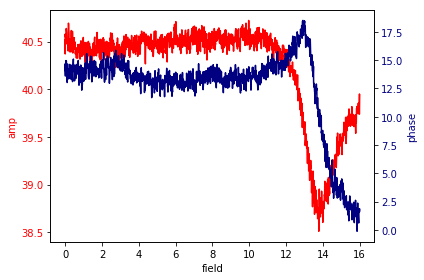

In [174]:
# here you have to give the filepath of the file you want to import
folder = "C:\\Users\\F25_1.307_b\\Box Sync\\Klingeler_Masterarbeit\\howardevansite\\LiCuFe2(VO4)3 powder\\ESR_fixed_powder\\"
status = "raw_data\\11 K\\"

temperature = '11'
f = '404p9'
sweep = 'd'
name = 'F' + f + 'T' +  temperature + 'K-' + sweep
#name = "-F52.9GHz-T" + temperature + "K-" + sweep + "_" + temperature + "K_52.9GHz_U.dat"

filename = folder + status + name

# import the file
temp, field, amp, phase, d, e  = data_import(filename, 2)

# plot the amplitude and phase versus the magnetic field
plot(amp, phase, field)

## Switch the amplitude and phase

### swap (data1, data2)
- output is (data2, data1)
- therefore data1, data2 = switch (data1, data2) switches the two data sets

In [34]:
amp, phase = swap (amp, phase)

## Remove jumps from the data

### jumps (data, field, dev)
- input parameters:
    - any type of data (phase or amplitude) where jumps need to be removed
    - magnetic field (array of same length as data)
    - dev: parameter telling you how big jumps have to be to be recognized as such (for more information see functions file)
- output: array of same length as data without jumps

In [175]:
amp_j = amp
phase_j = phase

In [ ]:
amp_j = jumps (amp_j, field, 2)

In [ ]:
phase_j = jumps (phase_j, field, 2)

## Subtract background baseline from the data

### baseline (data, field)
- input parameters:
    - any type of data (phase or amplitude) where baseline needs to be subtracted
    - magnetic field (array of same length as data)
- output: array of same length as data with subtracted backgorund

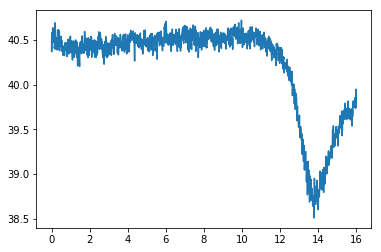

enter the minimum and maximum values of the peaks separated by commas (i.e. min1,max1,min2,max2,...): 10,16
what order polynomial do you want to fit to the data? 1


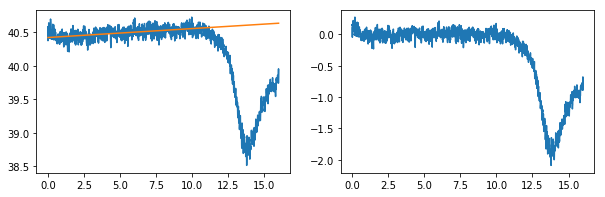

are you happy with the subtracted curve? [y/n/end/new]: 


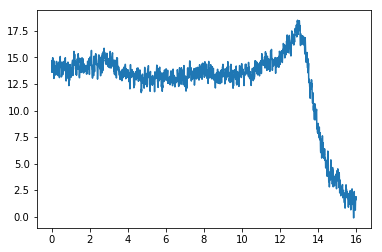

enter the minimum and maximum values of the peaks separated by commas (i.e. min1,max1,min2,max2,...): 8,16
what order polynomial do you want to fit to the data? 1


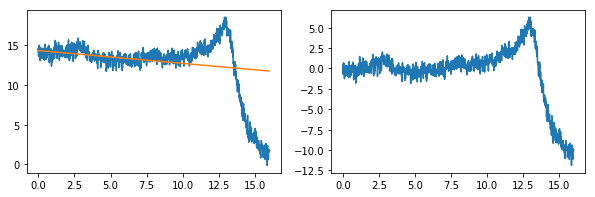

are you happy with the subtracted curve? [y/n/end/new]: 


In [176]:
amp_b = baseline(amp_j, field)
phase_b = baseline(phase_j, field)

# Perform phase corrections on the data
### This is done in several steps

### Kramers_Kronig(amplitude, field)
Calculate the phase from the amplitude via the Kramers Kronig relation (kkr)
    - input are amplitude and field
    - output is the phase calculated via the Kramers Kronig relation

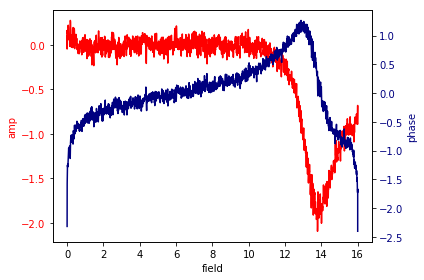

In [177]:
kkr = Kramers_Kronig(amp_b, field)
plot(amp_b, kkr, field)

### phasecorr (ampitude, phase, field, epsilon_min, epsilon_max, delta_epsilon)
Phase correct the amplitude with the Kramers Kronig calculated phase (this is important because now the amplitude and phase are correctly normalized to each other
    - input are:
        - amplitude, KKR_phase, field
        - minimum, maximum value for range of epsilon you want to check, and the step size
    - output:
        - phase corrected ampitude
        - phase calculated from the phase corrected amplitude
        - the value of epsilon used

enter the value of epsilon you ended up with: -0.4


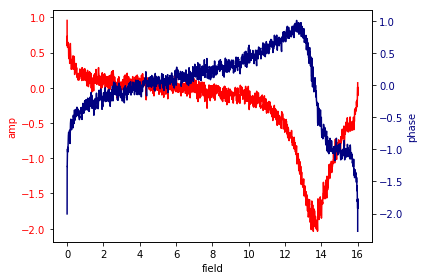

In [178]:
amp_p, phase_p_kkr, epsilon = phasecorr (amp_b, kkr, field, -1, 1.1, 0.1)

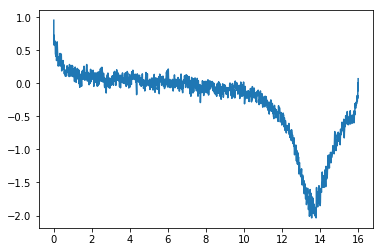

enter the minimum and maximum values of the peaks separated by commas (i.e. min1,max1,min2,max2,...): 0,0.5,11,15.5
what order polynomial do you want to fit to the data? 5


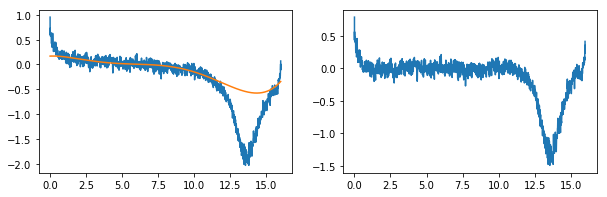

are you happy with the subtracted curve? [y/n/end/new]: 


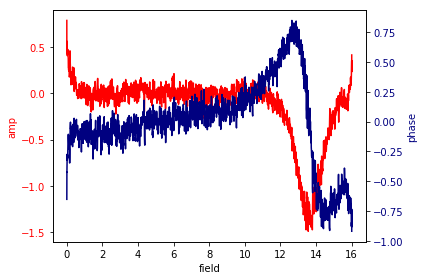

In [179]:
amp_p = baseline(amp_p, field)
phase_p_kkr = Kramers_Kronig(amp_p, field)
plot(amp_p, phase_p_kkr, field)

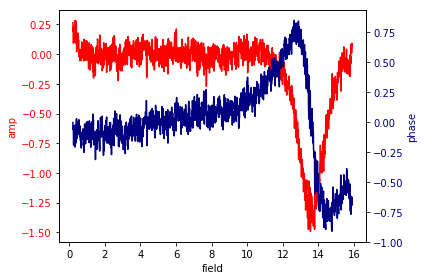

In [180]:
##### this just cuts out data points before limit1 and after limit2
# it is just cosmetics to get rid of artificial behavior of the data due to phase corrections
limit1 = 0.2
limit2 = 15.9

for i in np.arange(len(field)):
    if field[i]<limit1 or field[i]>limit2:
        amp_p[i] = np.nan
        phase_p_kkr[i] = np.nan
        
plot(amp_p, phase_p_kkr, field)

# Save the data

In [181]:
################### save including all the normalized data
data = [field, normalize(amp_p), normalize(phase_p_kkr), amp_p, phase_p_kkr,
        normalize(amp_b), normalize(phase_b), amp_b, phase_b, amp, phase, temp]
names = ['Field', 'Amp phase corr. norm.', 'Kramers Kornig Phase norm.', 'Amp p.c.', 'KKR Phase', 
         'Amp b. norm.', 'Phase b. norm.', 'Amp baseline', 'Phase baseline', 'Amp raw', 'Phase raw', 'T2']
units = ['T', 'a.u.', 'a.u.', 'a.u.', 'a.u.', 'a.u.', 'a.u.', 'a.u.', 'a.u.', 'a.u.', 'a.u.', 'K']
comments = ['epsilon = '+str(epsilon), comment(filename),comment(filename) , comment(filename), comment(filename),
            comment(filename), comment(filename), comment(filename), comment(filename), comment(filename),
            comment(filename), comment(filename)]


filename_new = folder + "processed_data\\" + name + '_processed.txt'
filename_new = filename + '_processed_p.txt'
save(data, names, units, comments, filename_new)

In [ ]:
################### save without the normalized data
data = [field, amp_p, phasep_kkr, amp_b, phase_b, amp, phase, temp]
names = ['Field', 'Amp p.c.', 'KKR Phase', 'Amp baseline', 'Phase baseline', 'Amp raw', 'Phase raw', 'T2']
units = ['T', 'a.u.', 'a.u.', 'a.u.', 'a.u.', 'a.u.', 'a.u.', 'K']
comments = ['epsilon = '+str(epsilon), comment(filename), comment(filename), comment(filename), comment(filename),
            comment(filename), comment(filename), comment(filename)]


filename_new = folder + "processed_data\\" + name + '_processed.txt'
#save(data, names, units, comments, filename_new)

In [9]:
################### save without phase correction
data = [field, normalize(amp_b), normalize(phase_b), amp_b, phase_b, amp, phase, temp]
names = ['Field', 'Amp b. norm.', 'Phase b. norm.', 'Amp baseline', 'Phase baseline', 'Amp raw', 'Phase raw', 'T2']
units = ['T', 'a.u.', 'a.u.', 'a.u.', 'a.u.', 'a.u.', 'a.u.', 'K']
comments = ['epsilon = 0', comment(filename),comment(filename), comment(filename), comment(filename),
            comment(filename), comment(filename), comment(filename)]


filename_new = folder + "processed_data\\" + name + '_processed.txt'
filename_new = filename + '_processed_b.txt'
save(data, names, units, comments, filename_new)

In [ ]:
################### save only jumps corrected
data = [field, amp_j, phase_j, amp, phase, temp]
names = ['Field', 'Amp j', 'Phase j', 'Amp raw', 'Phase raw', 'T2']
units = ['T', 'a.u.', 'a.u.', 'a.u.', 'a.u.', 'K']
comments = ['epsilon = 0', comment(filename),comment(filename), comment(filename), comment(filename),
            comment(filename)]


filename_new = folder + "processed_data\\" + name + '_processed.txt'
save(data, names, units, comments, filename_new)

In [ ]:
################### save only with baseline (and jump) correction - no normalization!
data = [field, amp_b, phase_b, amp, phase, temp]
names = ['Field', 'Amp baseline', 'Phase baseline', 'Phase raw', 'Phase raw', 'T2']
units = ['T', 'a.u.', 'a.u.', 'a.u.', 'a.u.', 'K']
comments = ['epsilon = 0', comment(filename), comment(filename),
            comment(filename), comment(filename), comment(filename)]


filename_new = folder + "processed_data\\" + name + '_processed.txt'
save(data, names, units, comments, filename_new)

In [93]:
a = 0.5063
b = 1.44497
c = (a+b)/2
print ( str(c) + ' +- ' + str((abs(a-c))) )

0.975635 +- 0.46933500000000006


In [27]:
g = 2.07133
dg = 0.00158
f = 9.63853

B = f / g / 13.98
dB = dg * f / g / g / 13.98

print (str(B) + ' +- ' + str(dB))

0.3328544264237983 +- 0.00025389966531146714
